# Life Expectancy Prediction

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore hwo immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training_v2.csv" and "LifeExpectancy_test_v2.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test_v2.csv"

Features :
- Year : from 2000 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training_v2.csv", contains 1154 rows and 14 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test_v2", contains 495 rows and 13 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

In [1]:
import numpy as np
import pandas as pd

Load the training data in Colab and View the first 5 lines

In [2]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_training.csv to LifeExpectancy_training.csv


In [3]:
import io

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training.csv']))
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,71.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1154 non-null   int64  
 1   Status                           1154 non-null   object 
 2   Adult_Mortality                  1154 non-null   int64  
 3   Alcohol                          1154 non-null   float64
 4   percentage_expenditure           1154 non-null   float64
 5   BMI                              1154 non-null   float64
 6   Total_expenditure                1154 non-null   float64
 7   Diphtheria                       1154 non-null   int64  
 8   HIV_AIDS                         1154 non-null   float64
 9   GDP                              1154 non-null   float64
 10  Population                       1154 non-null   float64
 11  Income_composition_of_resources  1154 non-null   float64
 12  Schooling           

## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

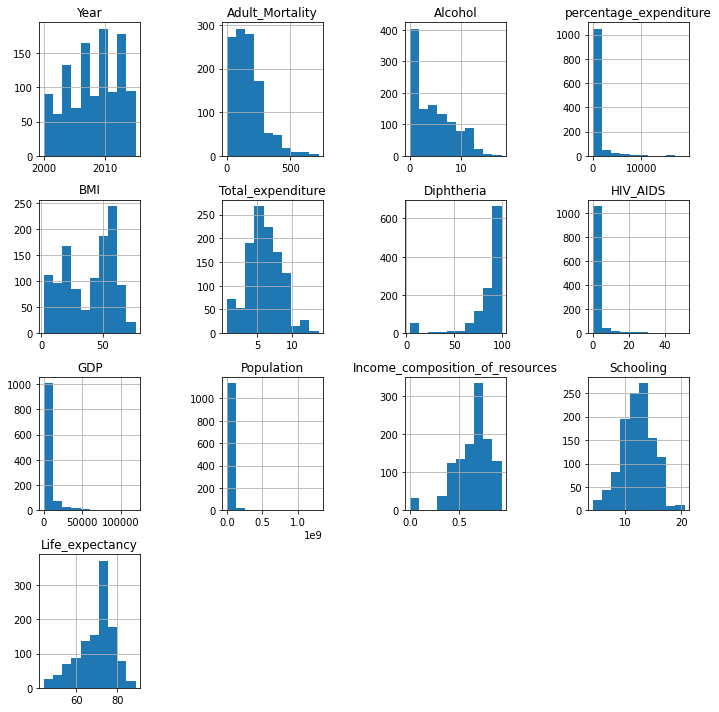

In [6]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
import matplotlib.pyplot as plt
plots = df.hist(figsize=(10,10))
plt.tight_layout()


##### Q1. What can you infer from the histograms? <br/>
- `GDP`, `Population`, `HIV_AIDS`, `percentage_expenditure` are all highly right-skewed (should be log-transformed) and have similar distributions likely resulting in a high degree of correlation.
- `Diphtheria`is negative-skewed.
- `Adult_Mortality` & `Alcohol` are  right-skewed and have similar distributions likely resulting in a high degree of correlation.
- `Income_composition_of_resources` and `Schooling` are sightly left-skewed and have similar distributions likely resulting in a high degree of correlation.
- `Income_composition_of_resources` and `Schooling` seem to correlate with the dependent variable `Life_expectancy` as they have similar distributions.
- One may infer that `Total_expenditure` correlates negatively with `Life_expectancy`.
- Dependent variable `Life_expectancy` is slightly left skewed and peaks around 75 years.
- More countries were added to the database over time (`Years`).
- The `Adult_Mortality` lies below 200 per 1000 population for most of the entries in this dataset.
- The per capita consumption of `Alcohol` per year is for some years as high as 17 litles for some countries in this data, however, for most countries it is much less.
- There are a few countries in our dataset who's `percentage_expenditure` on health is particularly large.
- `BMI` demonstrates a bimodal distribution. There are many countries on the high and low end of average population BMI with few in between.
- Governments spend, on average, roughly 5-6% of their `Total_Expenditure` on health.
- The immunization coverage for `Diphtheria` among 1 year olds is very high for most entries in this dataset. 
- The death rate of the babies who were born with `HIV_AIDS` is usually very low for most of the countries. 
- Most countries in our dataset have a low `GDP`.
- `Population` is so highly skewed that little can be infered about the difference in populations of the countries of this dataset.
- The `Income_composition_of_resources` graph shows that most countries seem to use their resources productively.
- `Schooling` is normally distributed with an average of roughly 13 years.

Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

In [ ]:
### WRITE CODE TO OBTAIN CORRELATION MATRIX ###
df.drop(columns=['Year', 'Status']).corr()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
Adult_Mortality,1.000000,-0.223558,-0.245146,-0.373558,-0.135219,-0.218970,0.522985,-0.266263,-0.009659,-0.479667,-0.459109,-0.703466
Alcohol,-0.223558,1.000000,0.424267,0.345296,0.224153,0.245480,-0.053519,0.446676,-0.014811,0.573437,0.609049,0.437203
percentage_expenditure,-0.245146,0.424267,1.000000,0.220621,0.184878,0.138710,-0.100698,0.957695,-0.014819,0.403653,0.417577,0.408438
BMI,-0.373558,0.345296,0.220621,1.000000,0.188025,0.190955,-0.232770,0.238966,-0.061945,0.520061,0.549841,0.549065
Total_expenditure,-0.135219,0.224153,0.184878,0.188025,1.000000,0.154105,0.015136,0.184139,-0.068187,0.183759,0.246624,0.199058
Diphtheria,-0.218970,0.245480,0.138710,0.190955,0.154105,1.000000,-0.152190,0.161987,-0.016045,0.340664,0.357381,0.357720
HIV_AIDS,0.522985,-0.053519,-0.100698,-0.232770,0.015136,-0.152190,1.000000,-0.115119,-0.025374,-0.265902,-0.233620,-0.586847
GDP,-0.266263,0.446676,0.957695,0.238966,0.184139,0.161987,-0.115119,1.000000,-0.015751,0.448989,0.462840,0.440497
Population,-0.009659,-0.014811,-0.014819,-0.061945,-0.068187,-0.016045,-0.025374,-0.015751,1.000000,0.005623,-0.016738,-0.011133
Income_composition_of_resources,-0.479667,0.573437,0.403653,0.520061,0.183759,0.340664,-0.265902,0.448989,0.005623,1.000000,0.797657,0.741092


##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
The diagonals in the correlation matrix are correlating each variable to itself. In these cases we can expect a perfect correlation (i.e. 1).

##### Q3. Why is the matrix symmetric along diagonal?<br/>
Correlation measure the linear dependence between two variables and is a commutative property (i.e. Corr(X,Y) == Corr(Y,X)).

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
We would choose the `Schooling` predictor as it has the highest correlation with our dependent variable `Life_expectancy`.

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set. 

In [7]:
#upload test set
uploaded = files.upload()

Saving LifeExpectancy_test.csv to LifeExpectancy_test.csv


In [8]:
dft = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_test.csv']))

In [9]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###
X = df.loc[:, df.columns != 'Life_expectancy'].copy()

In [10]:
scaler = StandardScaler()
scaler.fit(X.drop(columns=['Year', 'Status'])) #numpy.ndarray

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_numeric_training = scaler.transform(X.drop(columns=['Year', 'Status']))
X_numeric_test = scaler.transform(dft.drop(columns=['Year', 'Status']))

##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
* Advantages: It is useful when features have different ranges. It reduces the influence of magnitude.
* Disadvantages: Assumes a normal distribution.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
* z-score normalization is very useful as the continuous features have different ranges.
* z-score normalization may not be very useful as the continuous features have similar ranges. 
* A normalization technique should be used. In our dataset, variables such as Life_expectancy, Adult_mortality, and BMI are on very different scales. If we neglect to scale the data before using it in ML algorithms, algorithms who use distance will disproportionally affect features with a broad range of values.

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [12]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###
enc_Year = OneHotEncoder(sparse=False, drop=[2000])
enc_Year.fit(X[['Year']]) 

enc_Status = OneHotEncoder(sparse=False, drop=['Developed'])
enc_Status.fit(X[['Status']])

OneHotEncoder(categories='auto', drop=array(['Developed'], dtype=object),
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              sparse=False)

In [13]:
X_onhot_Year_training = enc_Year.transform(X[['Year']]) #numpy.ndarray
X_onhot_Year_test = enc_Year.transform(dft[['Year']]) 
X_onhot_Status_training = enc_Status.transform(X[['Status']])
X_onhot_Status_test = enc_Status.transform(dft[['Status']])

In [14]:
X_train = np.concatenate([X_numeric_training, X_onhot_Year_training, X_onhot_Status_training], axis=1) #numpy.ndarray
X_test = np.concatenate([X_numeric_test, X_onhot_Year_test, X_onhot_Status_test], axis=1)  #numpy.ndarray
y_train = df["Life_expectancy"] #numpy.ndarray
### PRINT THE SHAPE OF YOUR TRAINING SET X ###
X_train.shape

(1154, 27)

Q7. What are the advantages and disadvantages of using One-hot encoding?

* Advantages: One-hot encoding ensures that machine learning does not assume that higher numbers are more important.
* Disadvantages: For high cardinality, the feature space can really grow up quickly

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
### Fit the Multiple Linear Regression model on training set ###
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [17]:
### Upload "LifeExpectancy_ytest.csv" (the outcomes of test set) ###
uploaded = files.upload()

Saving LifeExpectancy_ytest.csv to LifeExpectancy_ytest.csv


In [18]:
y_test = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_ytest.csv']))

In [19]:
### Evaluate the Linear Regression model by computing MSE on both training set and test set ###
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Training MSE: {}'.format(mse_train))
print('Test MSE: {}'.format(mse_test))

Training MSE: 12.965318722949508
Test MSE: 13.7458339365048


Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [20]:
print(lr_model.coef_) 

[-2.0560016  -0.49000325  0.55240312  0.72574696  0.22795946  0.45655879
 -2.66691182  0.23152706 -0.05506158  2.04305151  2.65276553 -0.81416668
 -1.06612536 -0.77500688 -1.06211491 -1.08047587 -1.37443109 -1.38003099
 -1.69799232 -1.99798041 -2.1437721  -2.38425941 -2.30367194 -2.39145672
 -2.44319466 -0.41060049 -0.56333245]


In [21]:
X_numeric_name=list(X.drop(columns=['Year', 'Status'])) #the corresponding variable names for the linear regression coefficients
X_numeric_name.extend(['Year_2001','Year_2002','Year_2003','Year_2004','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010','Year_2011','Year_2012','Year_2013','Year_2014','Year_2015','Status_Developing'])
print(X_numeric_name)

['Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Income_composition_of_resources', 'Schooling', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Status_Developing']


Q9. Is there a problem of multicolinearity? Explain what you can do

Ans-  `GDP` and `percentage_expenditure` exhibit high correlation. `Schooling` and `Income_composition_of_resources` also exhibit high correlation. 
There is also multicolinearity between one-hot encoded columns. To fix this problem we can simply remove the predictors that are highly correlated or use a partial least squares regression analysis or PCA to reduce the dimensionality. For the one-hot encoded features, a common solution is to drop one of the features from the set.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 

Fill in the code for calculation of R2 score 

In [22]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
x1 = df["Schooling"].values.reshape(-1,1) 
y1 = df["Life_expectancy"].values.reshape(-1,1)
slr_model = LinearRegression() 
slr_model.fit(x1, y1) 
y_pred1 = slr_model.predict(x1)
r1=r2_score(y1, y_pred1)
# Print R2 score
print(r1)

0.5575121346397232


$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [ ]:
x2 = df[["Schooling", "Adult_Mortality"]].values
y1 = df["Life_expectancy"].values.reshape(-1,1)
slr_model = LinearRegression() 
slr_model.fit(x2, y1) 
y_pred2 = slr_model.predict(x2)
r2=r2_score(y1, y_pred2)
# Print R2 score
print(r2)

0.7223314341007621


$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
x3 = df[["Schooling", "Adult_Mortality","Population"]].values
y1 = df["Life_expectancy"].values.reshape(-1,1)
slr_model = LinearRegression() 
slr_model.fit(x3, y1) 
y_pred3 = slr_model.predict(x3)
r3=r2_score(y1, y_pred3)
# Print R2 score
print(r3)

0.7223745101723086


You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
adj_r2 = (1 - (1 - r1) * ((x1.shape[0] - 1) / 
          (x1.shape[0] - x1.shape[1] - 1)))
# Print Adjusted R2 score
print(adj_r2)

0.5571280305899312


Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:
adj_r2 = (1 - (1 - r2) * ((x2.shape[0] - 1) / 
          (x2.shape[0] - x2.shape[1] - 1)))
# Print Adjusted R2 score
print(adj_r2)

0.7218489517968538


Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
adj_r2 = (1 - (1 - r3) * ((x3.shape[0] - 1) / 
          (x3.shape[0] - x3.shape[1] - 1)))
# Print Adjusted R2 score
print(adj_r2)

0.7216502697640624


### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [23]:
import random

In [24]:
# Second design a function to implement 5-fold cross-validation. 
# The input: training data with features X , training target y, # of folds f.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(X, y, f):
    ### Write your code here ###
    cross_mse_val = [] #maintain the MSE for different k'th folds
    
    indices_all = list(range(len(y)))
    random.seed(300)
    random.shuffle(indices_all) 
    indices = np.array_split(indices_all, f)

    # determine training and validation set 
    for k in range(f):
        train_index = np.setdiff1d(indices_all, indices[k])
        X_train_cv = X[train_index]
        X_val = X[indices[k]]
        y_train_cv = y[train_index]
        y_val = y[indices[k]]
        # linear regression on all training but k'th fold
        lr = LinearRegression()
        lr.fit(X_train_cv, y_train_cv)
        # calculate the MSE on k'th fold
        y_val_pred = lr.predict(X_val) 
        mse_val = mean_squared_error(y_val, y_val_pred)

        cross_mse_val.append(mse_val)

    return(np.mean(cross_mse_val))

In [25]:
cross_val_mse(X_train, y_train, f=5)

13.916413817140796

In [ ]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE 
from itertools import combinations 

# List to maintain the different cross-validation MSE scores 
cross_val_mse_list = [] 
  
# List to maintain the different combinations of features
features = [] 

# Loop to compute the cross-validation MSE of different feature combinations
for i in range(1, X.shape[1]+1):
    comb = combinations(X, i) 
    for fea in comb:
        fea = list(fea)
        X_fea_training = X[fea]  
        num_exist=list(set(X_fea_training.columns) - set(['Year', 'Status']))
        cat_exist=list(set(X_fea_training.columns) & set(['Year', 'Status']))
        enc = OneHotEncoder(sparse=False, drop='first')
        scaler = StandardScaler()
        if num_exist == []:
            enc.fit(X_fea_training.drop(num_exist, axis=1))
            X_oh_training = enc.transform(X_fea_training.drop(num_exist, axis=1))
            X_trans_training = X_oh_training
           
        elif cat_exist == []:
            scaler.fit(X_fea_training[num_exist])
            X_num_training = scaler.transform(X_fea_training[num_exist])    
            X_trans_training = X_num_training
        else:
            enc.fit(X_fea_training.drop(num_exist, axis=1))
            scaler.fit(X_fea_training[num_exist])
            X_oh_training = enc.transform(X_fea_training.drop(num_exist, axis=1))
            
            X_num_training = scaler.transform(X_fea_training[num_exist])
            
            X_trans_training = np.concatenate([X_num_training, X_oh_training], axis=1)
            
        
        y_train = df["Life_expectancy"]

        avg_mse = cross_val_mse(X_trans_training, y_train, f = 5) 
        cross_val_mse_list.append(avg_mse) 
        features.append(fea) 


In [ ]:
# Print a list of the best covariates
val, idx = min((val, idx) for (idx, val) in enumerate(cross_val_mse_list))
best_feature = features[idx]
print(best_feature)


['Year', 'Status', 'Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI', 'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources', 'Schooling']


In [ ]:
# Print the corresponding mse
val

13.897628400222832

### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [31]:
train=pd.DataFrame(X_train,columns=X_numeric_name)
test=pd.DataFrame(X_test,columns=X_numeric_name)

In [35]:
best_train=train.drop(columns=['Total_expenditure','GDP','Population'])
best_test=test.drop(columns=['Total_expenditure','GDP','Population'])

In [37]:

# Bulding and fitting the Linear Regression model 
lr_model = LinearRegression() 
lr_model.fit(best_train, y_train) 


y_pred_train = lr_model.predict(best_train)
y_pred_test = lr_model.predict(best_test)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test) #y_test maintain the label for testset

# Evaluating the Linear Regression model by computing MSE on test set
print('Training MSE: {}'.format(mse_train))
print('Test MSE: {}'.format(mse_test))

Training MSE: 13.019297619165583
Test MSE: 13.819368621295345


In [ ]:
#end

if we use sklearn.model_selection.cross_val_score:

In [ ]:
from sklearn.model_selection import cross_val_score 
from itertools import combinations 

# List to maintain the different cross-validation MSE scores 
cross_val_mse_list = [] 
  
# List to maintain the different combinations of features
features = [] 

# Loop to compute the cross-validation MSE of different feature combinations
for i in range(1, X_full.shape[1]+1):
    comb = combinations(X_full, i) 
    for fea in comb:
        fea = list(fea)
        X = X_full[fea]
        num_exist=list(set(X.columns) - set(['Year', 'Status']))
        cat_exist=list(set(X.columns) & set(['Year', 'Status']))
        enc = OneHotEncoder(sparse=False, drop='first')
        scaler = StandardScaler()
        if num_exist == []:
            X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
            X_trans = X_oh
        elif cat_exist == []:
            X_num = scaler.fit_transform(X[num_exist])
            X_trans = X_num
        else:
            X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
            X_num = scaler.fit_transform(X[num_exist])
            X_trans = np.concatenate([X_num, X_oh], axis=1)
        X_train_cro = X_trans[:-dft.shape[0],:] #current training set 2d array
        X_test_cro = X_trans[-dft.shape[0]:,:] #current test set
        y_train = df["Life_expectancy"]

        lr = LinearRegression()
        mse = -cross_val_score(lr, X_train_cro, y_train, cv = 5, scoring=('neg_mean_squared_error')) 
        avg_mse = np.mean(mse)
        cross_val_mse_list.append(avg_mse) 
        features.append(fea)

In [ ]:
# Print a list of the best covariates
val, idx = min((val, idx) for (idx, val) in enumerate(cross_val_mse_list))
best_feature = features[idx]
print(best_feature)

['Year', 'Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Income_composition_of_resources', 'Schooling']


In [ ]:
# Print the corresponding mse
val

13.833354334380815